https://leetcode.com/problems/palindrome-partitioning-ii/description/

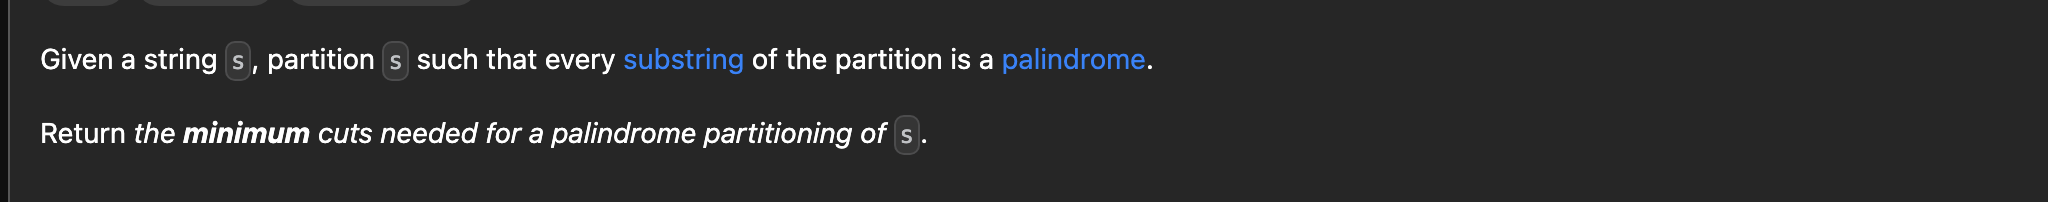

In [ ]:
class Solution {  
private:
    int f(int idx,  string &s,   vector<vector<int>> &isPal, int n, vector<int> &mem){
        //the last one elemenet is always a palindrome
        if(idx>=n-1 or isPal[idx][n-1]) return 0;
        if(mem[idx]!=-1) return mem[idx];
        int ans=INT_MAX;
        for(int i=idx;i<n;i++){
            if(isPal[idx][i]) ans=min(ans,1+f(i+1,s,isPal,n,mem));
        }
        return mem[idx]=ans;
    }

public:
    int minCut(string s) {
        int n=s.size();

        //part1
        vector<vector<int>> isPal(n,vector<int> (n,1));
        //empty substrings and substring of len 1 will be palindrome

        for(int i=1;i<n;i++){
            int r=0,c=i;
            while(c<n){
                isPal[r][c]= s[r]==s[c] and isPal[r+1][c-1];
                r++;
                c++;
            }
        }

        //part2
        vector<int> mem(n,-1);
        return f(0,s,isPal,n,mem);    
    }
};

state   
dp[i]= no of cuts to make the all stick from 0 to i palindrome  
dp[0]=0   
dp[n-1]=== problem   
dp[i]= if pal[0][i]==1 is 0  
        else      
                ```
                ```

In [ ]:
class Solution {  
    public:
        int minCut(string s) {
            int n=s.size();
    
            vector<vector<int>> pal(n,vector<int> (n,1));
            for(int i=1;i<n;i++){
                int r=0,c=i;
                while(c<n){
                    pal[r][c]= s[r]==s[c] and pal[r+1][c-1];
                    r++;
                    c++;
                }
            }
    
            vector<int> dp(n);
            dp[0]=0;
            for(int idx=0;idx<n;idx++){
                if(pal[0][idx]){
                    dp[idx]=0;
                    continue;
                } 
                int ans=INT_MAX;
                for(int i=1;i<=idx;i++){
                    if(pal[i][idx]) ans=min(ans,1+dp[i-1]);
                }
                dp[idx]=ans; 
            }
            return dp[n-1];   
        }
    };

In [ ]:

int minCut(string s) {
    int n=s.size();

    vector<vector<int>> pal(n,vector<int> (n,1));
    //pal[x][x]=1

    for(int i=1;i<n;i++){
        int r=0,c=i;
        while(c<n){
            pal[r][c]= s[r]==s[c] and pal[r+1][c-1];
            r++;
            c++;
        }
    }



    vector<int> dp(n);
    for(int idx=n-2;idx>=0;idx--){
        if(pal[idx][n-1]){
            dp[idx]=0;
            continue;
        } 
        int ans=INT_MAX;
        for(int i=idx;i<n;i++){
            if(pal[idx][i]) ans=min(ans,1+dp[i+1]);
        }
        dp[idx]=ans; 
    }
    return dp[0];   
}

https://leetcode.com/problems/partition-array-for-maximum-sum/description/    
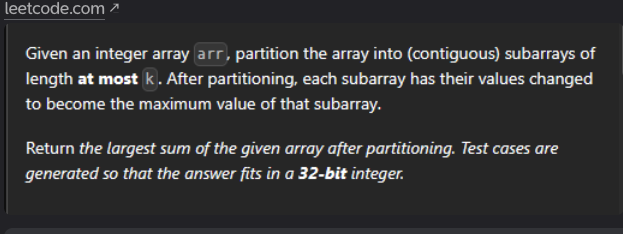


In [ ]:
class Solution {
    public:
        int f(int idx, vector<int>& v, int k, int n, vector<int> &mem){
            if(idx>=n) return 0;
            if(mem[idx]!=-1) return mem[idx];
            int len=0;
            int currmax=INT_MIN;
            int ans=INT_MIN;
            for(int j=idx;j<min(n,idx+k);j++){
                len++;
                currmax=max(currmax,v[j]);
                int sum=len*currmax + f(j+1,v,k,n,mem);
                ans=max(ans,sum);
            }
            return mem[idx]=ans;
        }
    
    
        int maxSumAfterPartitioning(vector<int>& v, int k) {
            int n=v.size();
            vector<int> mem(n,-1);
            return f(0,v,k,n,mem);
        }
    };

In [ ]:
class Solution {
    public:
        int maxSumAfterPartitioning(vector<int>& v, int k) {
            int n=v.size();
            vector<int> dp(n+1,-1);
            dp[n]=0;
            for(int idx=n-1;idx>=0;idx--){
                int len=0;
                int currmax=INT_MIN;
                int ans=INT_MIN;
                for(int j=idx;j<min(n,idx+k);j++){
                    len++;
                    currmax=max(currmax,v[j]);
                    int sum=len*currmax + dp[j+1];
                    ans=max(ans,sum);
                }
                dp[idx]=ans;
            }
            return dp[0];
        }
    };